In [1]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('/content/strightline.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# Apply edge detection (e.g., Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2_imshow(edges)
# Run Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 120, 200)  # Adjust the last parameter (threshold) as needed

# Draw detected lines on the original image

for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        print(x1,y1)
        print(x2,y2)
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the result
#cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


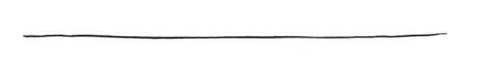

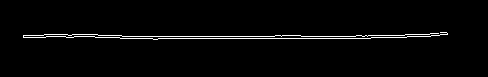

[[  0.           2.61799388]
 [  0.           2.65290046]
 [  0.           2.70526034]
 ...
 [493.           3.00196631]
 [493.           3.01941961]
 [493.           3.0368729 ]]


In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

def hough_lines(image, rho_resolution, theta_resolution, threshold):
    # Define the range of rho and theta
    width, height = image.shape
    max_rho = np.sqrt(width ** 2 + height ** 2)
    num_rhos = int(max_rho / rho_resolution)
    num_thetas = int(np.pi / theta_resolution)

    # Initialize accumulator
    accumulator = np.zeros((num_rhos, num_thetas), dtype=np.uint64)

    # Define theta values
    thetas = np.linspace(0, np.pi, num_thetas)

    # Detect edges
    edges = np.argwhere(image > 0)

    # Voting
    for edge in edges:
        x, y = edge
        for theta_index, theta in enumerate(thetas):
            rho = x * np.cos(theta) + y * np.sin(theta)
            rho_index = int(rho / rho_resolution)
            accumulator[rho_index, theta_index] += 1

    # Extract lines
    lines = np.argwhere(accumulator >= threshold)

    return lines * [rho_resolution, theta_resolution]

# Example usage:
image = cv2.imread('/content/strightline.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# Apply edge detection (e.g., Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2_imshow(edges)
lines = hough_lines(edges, rho_resolution=1, theta_resolution=np.pi/180, threshold=10)
print(lines)